# Analysis of Activation Functions

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## Rectified Linear Unit (ReLU)
Visual Representation of ReLU

**Equation:**

x <= 0: 0

x > 0: x


**Derivative:**

x <= 0: 0

x > 0: 1

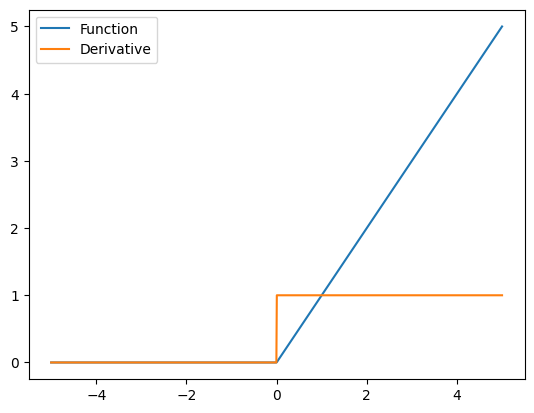

In [61]:
# Computing function of ReLU
c = 1
x = np.linspace(-5, 5, 1000) # Returns evenly spaced numbers over a specified interval
y = c * np.maximum(0, x)

# Computing derivative of ReLU
d_filter = lambda x: c if x > 0 else 0
dyReLU = [d_filter(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyReLU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Leaky ReLU
Visual Representation of Leaky ReLU

**Equation:**

x <= 0: x * fractional value

x > 0: x


**Derivative:**

x <= 0: fractional value

x > 0: 1

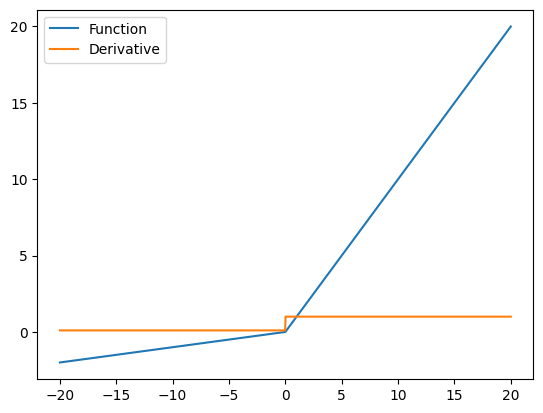

In [18]:
# Computing function of Leaky ReLU
c = 1
a = .1 # Our fractional value
x = np.linspace(-20, 20, 1000)
y = c * np.maximum(a*x, x)

# Computing derivative of Leaky ReLU
d_filter = lambda x: c if x > 0 else a
dyLReLU = c * [d_filter(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyLReLU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Gaussian Error Linear Unit (GELU)
Visual Representation of GELU

**Equation:**

![title](images/Picture1.png)

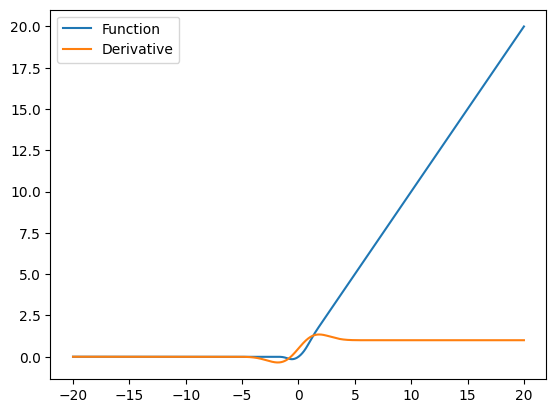

In [23]:
# Computing function of GELU
c = 1
a = .1
x = np.linspace(-20, 20, 1000)
y = 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.44715*np.power(x, 3))))

# Computing derivative of GELU
def gelu_prime(x):
    p1 = 0.5*np.tanh(0.0356774*np.power(x, 3)+0.797885*x)
    p2 = (0.0535161*np.power(x, 3)+0.398942*x)
    p3 = 1/np.cosh(0.0356774*np.power(x, 3)+0.797885*x)
    return p1 + (p2 * p3) + 0.5
dyGELU = c * [gelu_prime(ele) for ele in x]

plt.plot(x,y, label='Function')
plt.plot(x, dyGELU, label='Derivative')
plt.legend(loc="upper left")
plt.show()

## Parametric Rectified Linear Units (PReLU)
Visual Representation of PReLU

**Equation:**

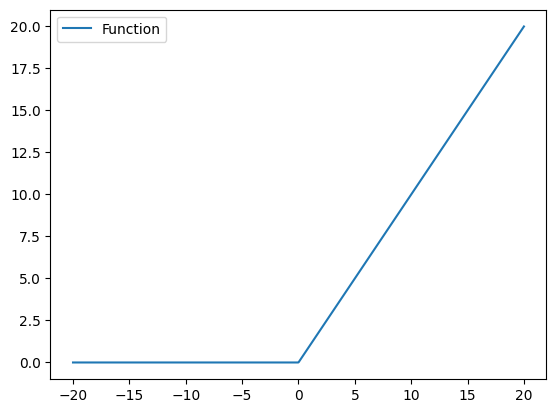

In [41]:
# Computing function of PReLU: if a = 0, this becomes ReLU
c = 1
a = 0
x = np.linspace(-20, 20, 1000)
y = []
for curr_x in x:
    if curr_x < 0:
        y.append(a * curr_x)
    else:
        y.append(curr_x)

plt.plot(x,y, label='Function')
plt.legend(loc="upper left")
plt.show()

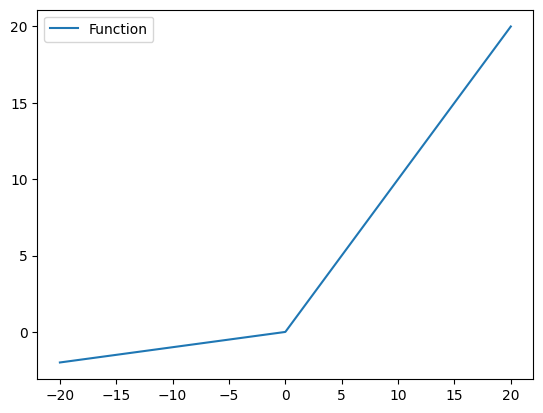

In [43]:
# Computing function of PReLU: if a > 0, this becomes Leaky ReLU
c = 1
a = 0.1
x = np.linspace(-20, 20, 1000)
y = []
for curr_x in x:
    if curr_x < 0:
        y.append(a * curr_x)
    else:
        y.append(curr_x)

plt.plot(x,y, label='Function')
plt.legend(loc="upper left")
plt.show()

## Experiment of Different Activation Functions in the Example for Lecture 04

Inputs (1, 2) --> Hidden Layer (1, 3) --> Output (1)

**ReLU:**

In [6]:
from sklearn import preprocessing

np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [7]:
def feed_forward(X, W_1, W_2):
    Z_1 = relu(X.dot(W_1)) # ReLU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def relu(Z):
    return (np.maximum(0, Z))


def mse(Z_2, Y):
    # Calculates the sum (error^2)
    return (np.sum(np.power((Y - Z_2), 2)) / Y.shape[0])


def update_weights_linear(X, W_1, W_2, Z_1, Z_2, Y, lr):

    z1_slope = np.where(Z_1>0,1,0)
    error_w2 = W_2.dot((Y - Z_2).reshape(-1, 1).T)
    w1_gradient = -X.T.dot((error_w2.T * z1_slope))
    w1_gradient = w1_gradient / X.shape[0]
    W_1 = W_1 - (lr * w1_gradient)
    
    # Gradient is -2 * X * (error)
    w2_gradient = -Z_1.T.dot((Y-Z_2))
    w2_gradient = w2_gradient / Z_1.shape[0]
    # Calculates the gradient on a per feature basis
    W_2 = W_2 - (lr * w2_gradient).reshape(3, 1)
    return (W_1, W_2)

In [8]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size # Starting index of our next batch
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [9]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11762.921698711523
loss = 0.6748810076637705
loss = 0.5033709981929599
loss = 0.3796944585648287
loss = 0.28725131035478657
loss = 0.2176895754954502
loss = 0.16515467828492383
loss = 0.12538192556401426
loss = 0.0952221812639622
loss = 0.07232838692129183
W_1:
 [[ 2.47047515  2.30915112  1.79240786]
 [-3.16638679  0.59860714  0.81076684]
 [ 1.44409845  1.54299019  1.42965248]]

W_2:
 [[-0.01863557]
 [-1.46969349]
 [ 2.27165287]]


In [10]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.87074095 16.17781109 18.1556539  30.75150581 28.77366301]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47047515  2.30915112  1.79240786]
 [-3.16638679  0.59860714  0.81076684]
 [ 1.44409845  1.54299019  1.42965248]]

Our resulting weights:
[[-0.01863557]
 [-1.46969349]
 [ 2.27165287]]



**Leaky ReLU**

In [11]:
np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [12]:
def feed_forward(X, W_1, W_2):
    Z_1 = leakyReLU(X.dot(W_1)) # Leaky ReLU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def leakyReLU(Z):
    a = .1 # Our fractional value
    return (np.maximum(a * Z, Z))

In [13]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size 
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [14]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11647.594708599318
loss = 0.684094080537747
loss = 0.48329581607857813
loss = 0.364036856703672
loss = 0.27668807387788247
loss = 0.21077388474236936
loss = 0.16073561489468177
loss = 0.12265266900791484
loss = 0.09362398738690442
loss = 0.0714755018606779
W_1:
 [[ 2.47096806  2.30905062  1.79304986]
 [-3.16362403  0.60330825  0.81007466]
 [ 1.45665327  1.54039723  1.42967053]]

W_2:
 [[-0.02257359]
 [-1.46968753]
 [ 2.27231666]]


In [15]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.8607936  16.17618648 18.15939368 30.75646448 28.77325728]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47096806  2.30905062  1.79304986]
 [-3.16362403  0.60330825  0.81007466]
 [ 1.45665327  1.54039723  1.42967053]]

Our resulting weights:
[[-0.02257359]
 [-1.46968753]
 [ 2.27231666]]



**GELU:**

In [16]:
np.random.seed(8)

X = np.random.randint(1, 20, size=(200, 2))
W_1 = 3 * np.random.randn(X.shape[1], 3)
W_2 = 3 * np.random.randn(W_1.shape[1], 1)
Y = X.sum(axis=1)

add_intercept = True
if add_intercept:
    X = np.pad(X, [(0, 0), (1, 0)], 'constant', constant_values=1)
    W_1 = 3 * np.random.randn(X.shape[1], 3)
    W_2 = 3 * np.random.randn(W_1.shape[1], 1)

print(X[:5])
print(Y[:5])
print(f'\nHidden Layer Weights:\n{W_1}')
print(f'\nHidden Layer Weights:\n{W_2}')

lr = .00000001

[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]
[22 16 18 31 29]

Hidden Layer Weights:
[[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

Hidden Layer Weights:
[[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]


In [72]:
def feed_forward(X, W_1, W_2):
    Z_1 = gelu(X.dot(W_1)) # GELU
    Z_2 = Z_1.dot(W_2).sum(axis=1)
    return (Z_1, Z_2)

def gelu(Z):
    return (0.5 * Z * (1 + np.tanh(np.sqrt(2/np.pi) * (Z + 0.44715 * np.power(Z, 3)))))

In [73]:
def mlp_regression_model(X, Y, W_1, W_2, lr=0.0001, epochs=1000, batch_size=20):
    for e_ix in range(epochs):
        Z_1, Z_2 = feed_forward(X, W_1, W_2)
        for ix in range(int(X.shape[0]/batch_size)):
            b_start = ix * batch_size 
            W_1, W_2 = update_weights_linear(X[b_start:b_start+batch_size], W_1,
                                      W_2, Z_1[b_start:b_start+batch_size],
                                      Z_2[b_start:b_start+batch_size],
                                      Y[b_start:b_start+batch_size], lr)
        if e_ix % int(epochs/10) == 0:
            pass
            print(f'loss = {mse(Z_2, Y)}')
    return (W_1, W_2)

In [74]:
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')
# Learning rate above 1e-6 break
W_1, W_2 = mlp_regression_model(X, Y, W_1, W_2, lr=0.00001, epochs=10000, batch_size=20)
print(f'W_1:\n {W_1}\n\nW_2:\n {W_2}')

W_1:
 [[ 2.48260954  2.13197591  2.13802959]
 [-3.119056    0.51675047  1.24956663]
 [ 1.64693407  2.94434993 -0.43762136]]

W_2:
 [[-0.62567281]
 [-2.78625183]
 [ 2.40242897]]
loss = 11767.712722042936
loss = 0.6753389089207551
loss = 0.503663658420346
loss = 0.37982037801084867
loss = 0.28727245205884405
loss = 0.21764949628635122
loss = 0.1650816974549808
loss = 0.12529411991384334
loss = 0.09513080188295137
loss = 0.07224014503139557
W_1:
 [[ 2.47046446  2.30924201  1.79226547]
 [-3.16641646  0.59854697  0.8108512 ]
 [ 1.44406122  1.5428852   1.42969469]]

W_2:
 [[-0.01849652]
 [-1.46969231]
 [ 2.27143301]]


In [75]:
print(f'\nOur inputs:\n{X[:5]}\n')
print(f'Our predictions:\n{feed_forward(X, W_1, W_2)[1][:5]}\n')
print(f'Our actual:\n{Y[:5]}\n')
print(f'Our resulting weights:\n{W_1}\n')
print(f'Our resulting weights:\n{W_2}\n')


Our inputs:
[[ 1  4 18]
 [ 1 10  6]
 [ 1  9  9]
 [ 1 17 14]
 [ 1 18 11]]

Our predictions:
[21.87139217 16.17761387 18.15516714 30.7515275  28.77397423]

Our actual:
[22 16 18 31 29]

Our resulting weights:
[[ 2.47046446  2.30924201  1.79226547]
 [-3.16641646  0.59854697  0.8108512 ]
 [ 1.44406122  1.5428852   1.42969469]]

Our resulting weights:
[[-0.01849652]
 [-1.46969231]
 [ 2.27143301]]



## Vanishing Gradients ##

ReLU better than tanh and sigmoid

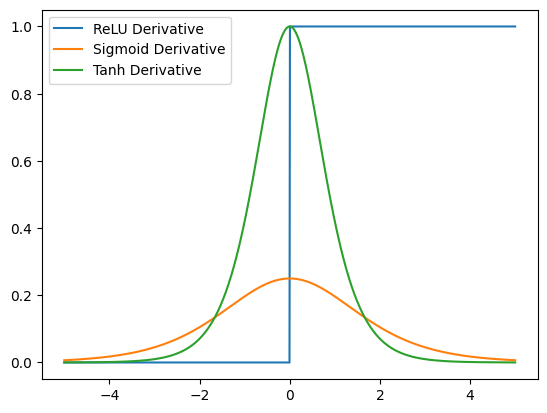

In [59]:
import math

# Computing derivative function of ReLU
c = 1
x = np.linspace(-5, 5, 1000) # Returns evenly spaced numbers over a specified interval
d_filter = lambda x: c if x > 0 else 0
dyReLU = [d_filter(ele) for ele in x]

# Computing derivative function of Sigmoid
def sig(x):
    return (1/ (1 + math.exp(-x)))

def d_sig(x):
    return(sig(x) * (1- sig(x)))
dySig = [d_sig(ele) for ele in x]

# Computing derivative function of Tanh
dyTanh = 1 - np.power(np.tanh(x), 2)

plt.plot(x, dyReLU, label='ReLU Derivative')
plt.plot(x, dySig, label='Sigmoid Derivative')
plt.plot(x, dyTanh, label='Tanh Derivative')
plt.legend(loc="upper left")
plt.show()

ReLU is considered to be better than Sigmoid or Tanh activation functions because it does not saturate as well as it has constant and bigger gradients. For Sigmoid and Tanh, their derivates are extremely close to 0, which means that if inputs are between these bad regions (one in original functions), then there would be almost no gradient to propagate back through the network.

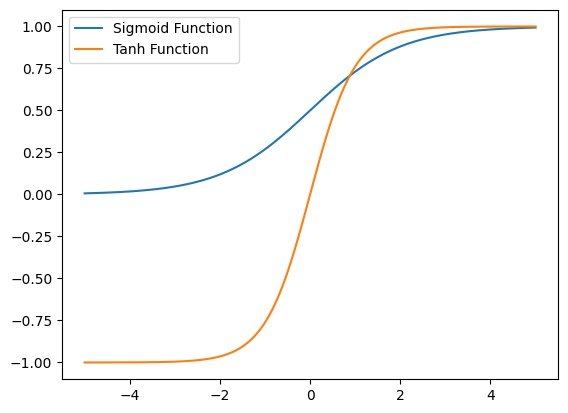

In [60]:
# Computing function of Sigmoid
def sig(x):
    return (1/ (1 + math.exp(-x)))
sig = [sig(ele) for ele in x]

# Computing function of Tanh
tan = np.tanh(x)

plt.plot(x, sig, label='Sigmoid Function')
plt.plot(x, tan, label='Tanh Function')
plt.legend(loc="upper left")
plt.show()

Issue of the vanishing gradient comes from the fact that when the inputs are either very small or very large, they either saturate to 0 and 1 (Sigmoid) or -1 and 1 (Tanh). With ReLU, there is no aspect of the gradient vanishing as it has the result being eihter 0 or 1. 

**Is Leaky ReLU better than ReLU than?**



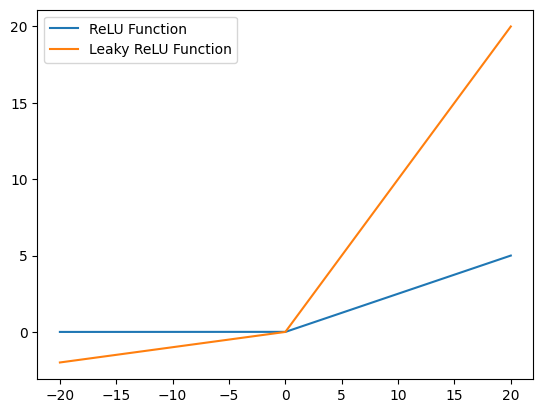

In [65]:
# Computing function of ReLU
c = 1
x = np.linspace(-5, 5, 1000) # Returns evenly spaced numbers over a specified interval
ReLU = c * np.maximum(0, x)

# Computing function of Leaky ReLU
c = 1
a = .1 # Our fractional value
x = np.linspace(-20, 20, 1000)
LReLU = c * np.maximum(a*x, x)

plt.plot(x, ReLU, label='ReLU Function')
plt.plot(x, LReLU, label='Leaky ReLU Function')
plt.legend(loc="upper left")
plt.show()

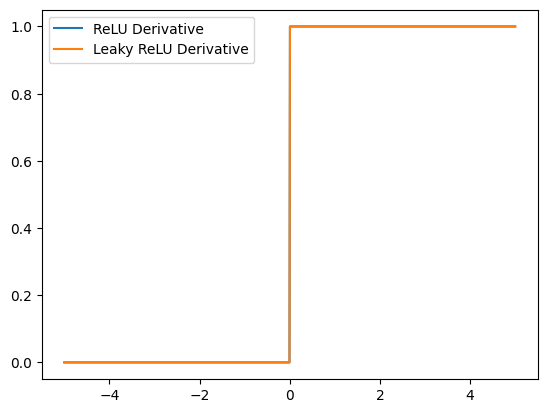

In [64]:
# Computing derivative of ReLU
d_filter = lambda x: c if x > 0 else 0
dyReLU = [d_filter(ele) for ele in x]

# Computing derivative of Leaky ReLU
d_filter = lambda x: c if x > 0 else a
dyLReLU = c * [d_filter(ele) for ele in x]

plt.plot(x, dyReLU, label='ReLU Derivative')
plt.plot(x, dyLReLU, label='Leaky ReLU Derivative')
plt.legend(loc="upper left")
plt.show()

Based on numerous articles that talked about how ReLU was able to solve the vanishing gradients problem using the derivative aspect, the derivatives of both Leaky ReLU and ReLU are the same. Hence, this probably means that they're both able to solve the vanishing gradients problem we've seen before. One downside that was seen in ReLU was the aspect called "Dying ReLU" (or dead neurons). This is when all the negative values return a zero. As a result of a neuron being "dead" (negative number being 0), it's unlikely for this neuron to recover and becomes useless. Later on, this might be a snowball effect where a large part of the network may end up doing nothing. A solution to this 'dead neuron' is the use of Leaky ReLU because it has a negative slope once the input is less than 0 unlike ReLU which has a zero slope.

When it comes down to deciding which one is better between ReLU and Leaky ReLU, I think it's a matter of the situation being used. If the dead neurons is being seen as a major issue, then using Leaky ReLU would be better usage as this has been seen as the alternative. However, the perfromance between the two are not drastic enough to consider one better than the other. It has also been noted that there is no signficant result improvement with leaky ReLU compared to ReLU except in sparsity and dispersion.

In [79]:
# Using Tensorflow to use the leaky ReLU
import tensorflow as tf
from tensorflow.keras.layers import LeakyReLU

leaky_relu = LeakyReLU(alpha=0.01)
z = tf.constant([-2.5, -0.5, 0, 0.5], dtype=tf.float32)
output=leaky_relu(z)

print(output.numpy())

[-0.025 -0.005  0.     0.5  ]
